In [281]:
from pandas_datareader import data,wb #it allows us to read the stock analysis from internet directly
import pandas as pd
import seaborn as sns
import chart_studio.plotly as py
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import numpy as np
import datetime
import matplotlib.pyplot as plt
import yfinance as yf
%matplotlib inline
init_notebook_mode(connected=True)
cf.go_offline()

# Stock analysis of the following banks from 2006 to 2016 :
## 1.Bank of America
## 2.CitiGroup
## 3.JPMorgan Chase
## 4.Morgan Stanley
## 5.Goldman Sachs
## 6.Wells Fargo

In [282]:
start=datetime.datetime(2006,1,1) #YEAR,MONTH,DAY
end=datetime.datetime(2016,1,1) #YEAR,MONTH,DAY

In [283]:
BAC= yf.download("BAC", start=start, end=end) #StockTicker Symbol for Bank of America -> BAC
C= yf.download("C", start=start, end=end) #StockTicker Symbol for CITIGROUP -> BAC
GS= yf.download("GS", start=start, end=end) #StockTicker Symbol for JPMORGAN CHASE -> BAC
JPM= yf.download("JPM", start=start, end=end) #StockTicker Symbol for MORGAN STANLEY -> BAC
MS= yf.download("MS", start=start, end=end) #StockTicker Symbol for GOLDMAN SACHS -> BAC
WFC= yf.download("WFC", start=start, end=end) #StockTicker Symbol for WELLS FARGO -> WFC

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [284]:
BAC.head()

Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2006-01-03  46.919998  47.180000  46.150002  47.080002  31.943672  16296700
2006-01-04  47.000000  47.240002  46.450001  46.580002  31.604424  17757900
2006-01-05  46.580002  46.830002  46.320000  46.639999  31.645142  14970700
2006-01-06  46.799999  46.910000  46.349998  46.570000  31.597652  12599800
2006-01-09  46.720001  46.970001  46.360001  46.599998  31.618015  15619400

In [285]:
tickers=['BAC','C','GS','JPM','MS','WFC']

In [286]:
bank_stocks=pd.concat([BAC,C,GS,JPM,MS,WFC],axis=1,keys=tickers)
bank_stocks

BAC                        ...        WFC                     
                 Open       High        Low  ...      Close  Adj Close    Volume
Date                                         ...                                
2006-01-03  46.919998  47.180000  46.150002  ...  31.900000  19.124540  11016400
2006-01-04  47.000000  47.240002  46.450001  ...  31.530001  18.902725  10870000
2006-01-05  46.580002  46.830002  46.320000  ...  31.495001  18.881742  10158000
2006-01-06  46.799999  46.910000  46.349998  ...  31.680000  18.992655   8403800
2006-01-09  46.720001  46.970001  46.360001  ...  31.674999  18.989649   5619600
...               ...        ...        ...  ...        ...        ...       ...
2015-12-24  17.320000  17.379999  17.219999  ...  54.820000  42.802177   4999400
2015-12-28  17.219999  17.230000  16.980000  ...  54.680000  42.692852   8288800
2015-12-29  17.250000  17.350000  17.160000  ...  55.290001  43.169132   7894900
2015-12-30  17.200001  17.240000  17.040001  ...  54.889999  42.856827   8016900
2015-12-31  17.010000  17.070000  16.830000  ...  54.360001  42.442993  10929800

[2517 rows x 36 columns]

In [287]:
bank_stocks.columns.names=['BANK TICKERS','STOCK INFO']

In [288]:
bank_stocks

BANK TICKERS        BAC                        ...        WFC                     
STOCK INFO         Open       High        Low  ...      Close  Adj Close    Volume
Date                                           ...                                
2006-01-03    46.919998  47.180000  46.150002  ...  31.900000  19.124540  11016400
2006-01-04    47.000000  47.240002  46.450001  ...  31.530001  18.902725  10870000
2006-01-05    46.580002  46.830002  46.320000  ...  31.495001  18.881742  10158000
2006-01-06    46.799999  46.910000  46.349998  ...  31.680000  18.992655   8403800
2006-01-09    46.720001  46.970001  46.360001  ...  31.674999  18.989649   5619600
...                 ...        ...        ...  ...        ...        ...       ...
2015-12-24    17.320000  17.379999  17.219999  ...  54.820000  42.802177   4999400
2015-12-28    17.219999  17.230000  16.980000  ...  54.680000  42.692852   8288800
2015-12-29    17.250000  17.350000  17.160000  ...  55.290001  43.169132   7894900
2015-12-30    17.200001  17.240000  17.040001  ...  54.889999  42.856827   8016900
2015-12-31    17.010000  17.070000  16.830000  ...  54.360001  42.442993  10929800

[2517 rows x 36 columns]

In [289]:
for tick in tickers:
    print(tick,'-->',bank_stocks[tick]['Close'].max())

BAC --> 54.900001525878906
C --> 564.0999755859375
GS --> 247.9199981689453
JPM --> 70.08000183105469
MS --> 89.30000305175781
WFC --> 58.52000045776367


In [290]:
bank_stocks.xs(key='Close',axis=1,level='STOCK INFO').max()

BANK TICKERS
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

# Analysing the average return of the stock price for the stocks at the closing time

In [291]:
returns=pd.DataFrame()

In [292]:
for tick in tickers:
    returns[tick+' Return']=bank_stocks[tick]['Close'].pct_change()

In [293]:
returns.columns.names=['BANK']
returns.head()
#the first value is none as obviously we can't get any return on the first day when we buy the stock

BANK        BAC Return  C Return  GS Return  JPM Return  MS Return  WFC Return
Date                                                                          
2006-01-03         NaN       NaN        NaN         NaN        NaN         NaN
2006-01-04   -0.010620 -0.018462  -0.013812   -0.014183   0.000686   -0.011599
2006-01-05    0.001288  0.004961  -0.000393    0.003029   0.002742   -0.001110
2006-01-06   -0.001501  0.000000   0.014169    0.007046   0.001025    0.005874
2006-01-09    0.000644 -0.004731   0.012030    0.016242   0.010586   -0.000158

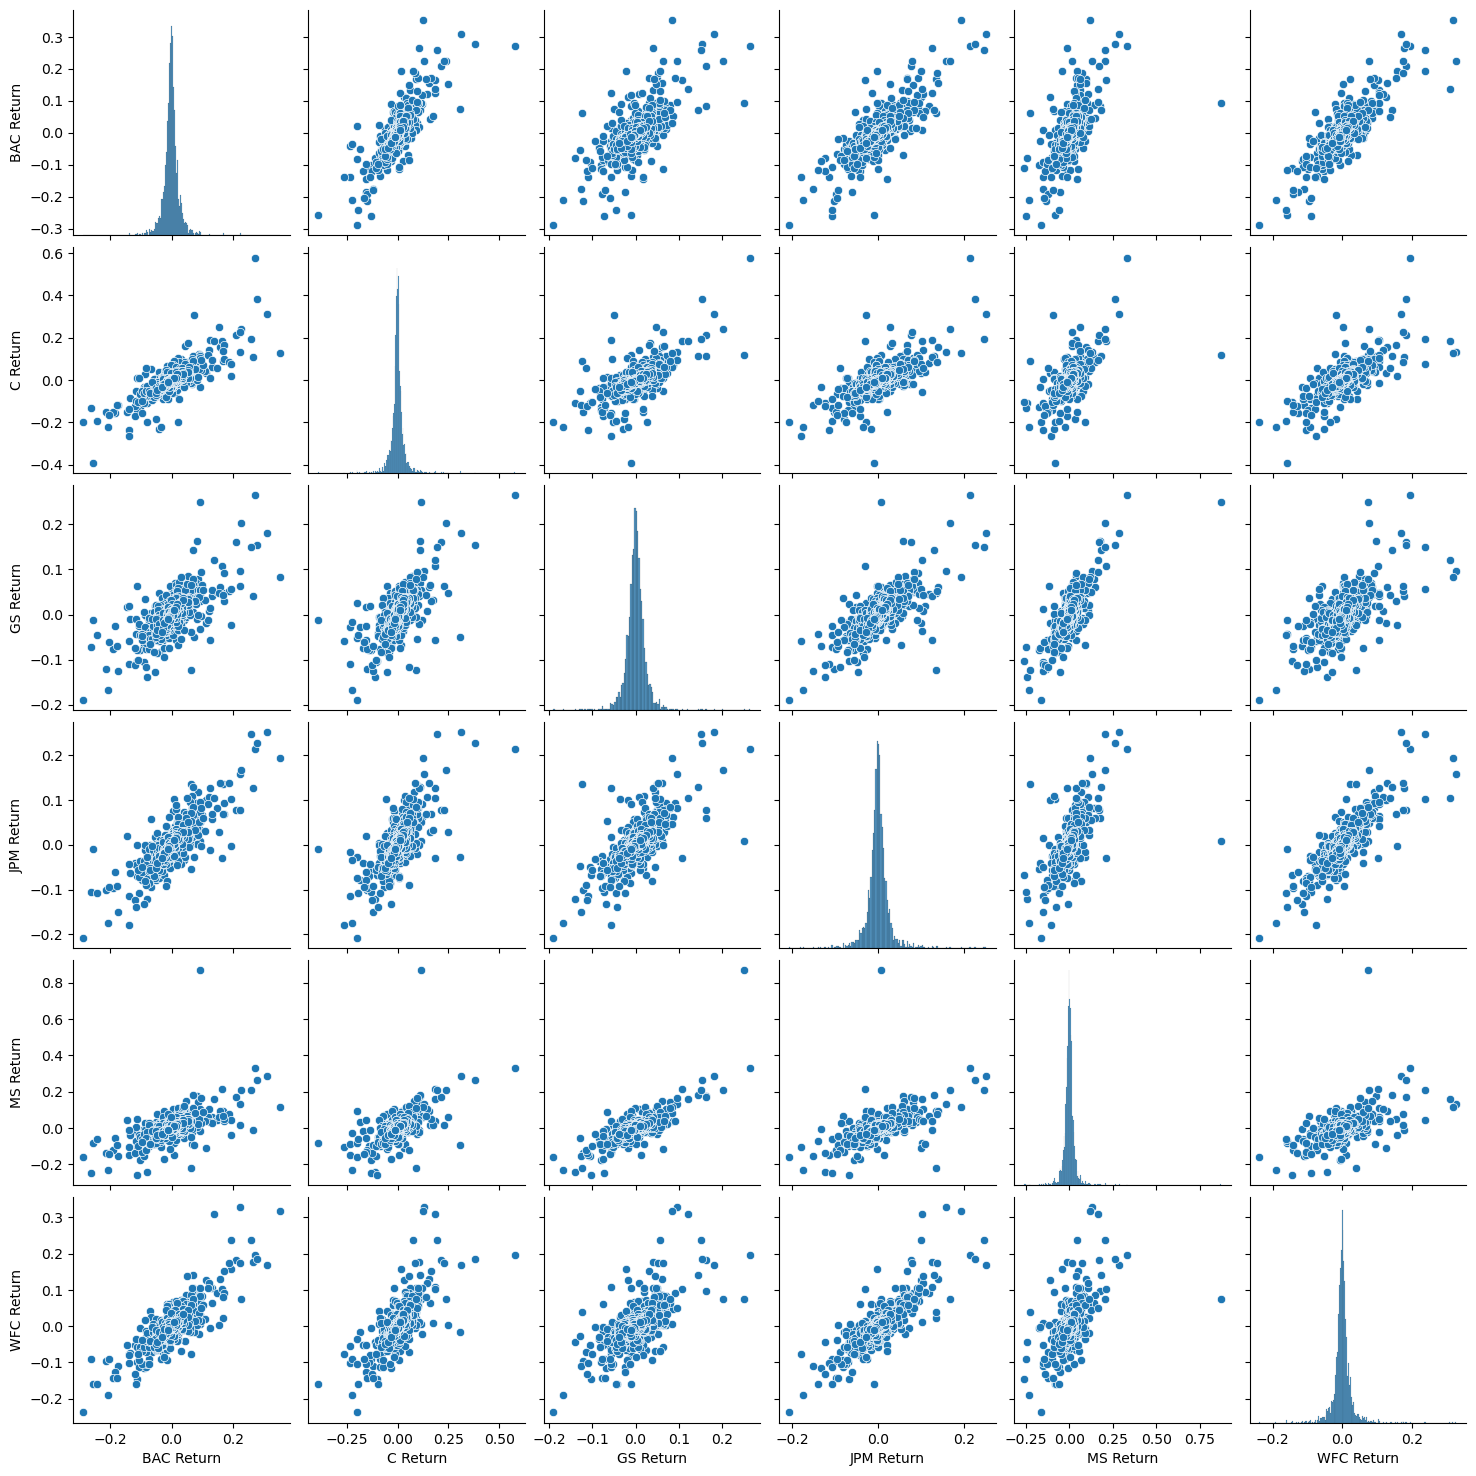

In [294]:
sns.pairplot(returns[1:]) #returns[1:] because it cannot plot the NaN values 

In [295]:
#Date when we had all the minimum values of the stock
returns.idxmin() #returns the timestamp when the prices of the stock was at the lowest

BANK
BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [296]:
returns.idxmax()

BANK
BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [297]:
#we found out that MS stock grew exponentially between the dates 2008-10-09 to 2008-10-13 in 4 days

# Riskiest Stock to buy

In [298]:
#More the standard deviation more the risk and less the standard deviation means less the risk 
# np.std(returns) 
returns.std()

BANK
BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [299]:
#The best stock market was of Goldman Sachs
#The worst stock market was of CitiGroup

In [300]:
returns.head()

BANK        BAC Return  C Return  GS Return  JPM Return  MS Return  WFC Return
Date                                                                          
2006-01-03         NaN       NaN        NaN         NaN        NaN         NaN
2006-01-04   -0.010620 -0.018462  -0.013812   -0.014183   0.000686   -0.011599
2006-01-05    0.001288  0.004961  -0.000393    0.003029   0.002742   -0.001110
2006-01-06   -0.001501  0.000000   0.014169    0.007046   0.001025    0.005874
2006-01-09    0.000644 -0.004731   0.012030    0.016242   0.010586   -0.000158

In [301]:
returns.loc['2015-01-01':'2015-12-31'].std() #To get the data of the year of 2015 riskiest stock
#the stock with the least number is the most reliable and vice-versa

BANK
BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

# 2015 Returns for Morgan Stanley

<Axes: xlabel='MS Return', ylabel='Count'>

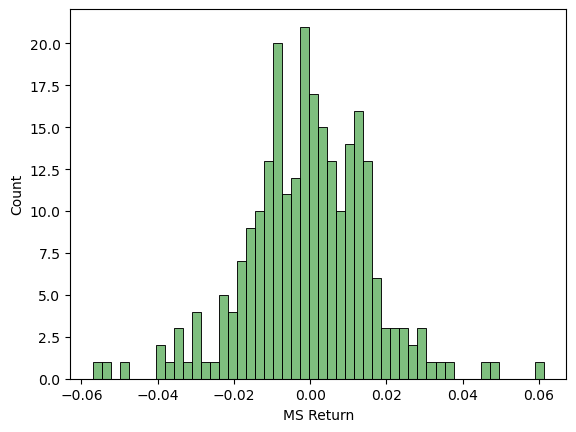

In [302]:
sns.histplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=50,alpha=0.5)

<Axes: xlabel='MS Return', ylabel='Density'>

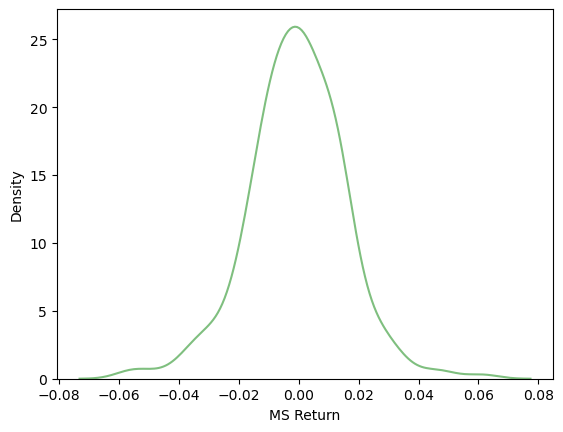

In [303]:
sns.kdeplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'],color='green',alpha=0.5)

# 2008 Return for CitiGroup

/var/folders/mg/rcr7nks14gv8j_rmk8qrv37c0000gn/T/ipykernel_27856/2671847864.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='C Return', ylabel='Density'>

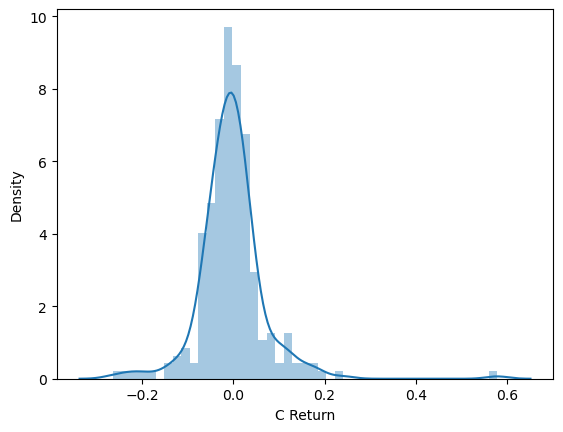

In [304]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'])

<Axes: xlabel='C Return', ylabel='Count'>

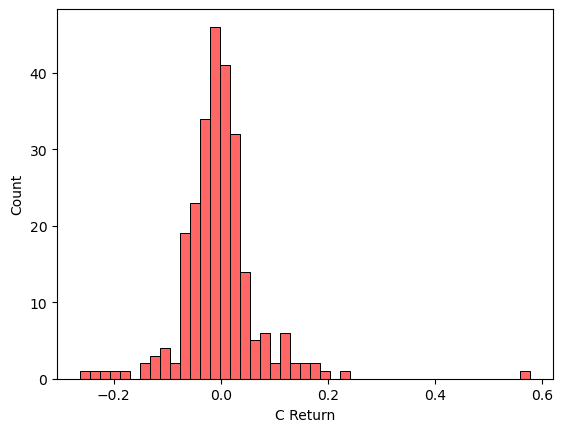

In [305]:
sns.histplot(returns.loc['2008-01-01':'2008-12-31']['C Return'],color='red',alpha=0.6)

<Axes: xlabel='C Return', ylabel='Density'>

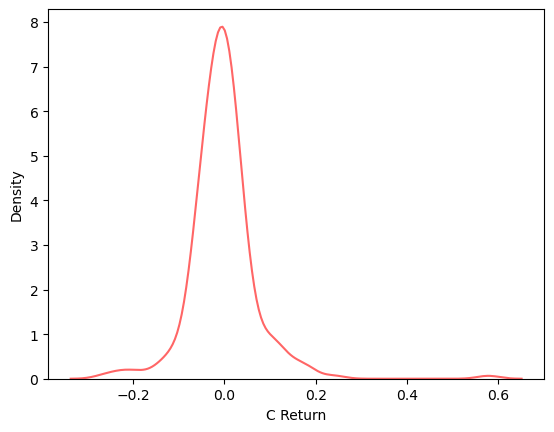

In [306]:
sns.kdeplot(returns.loc['2008-01-01':'2008-12-31']['C Return'],color='red',alpha=0.6)

Text(0, 0.5, 'Closing Price')

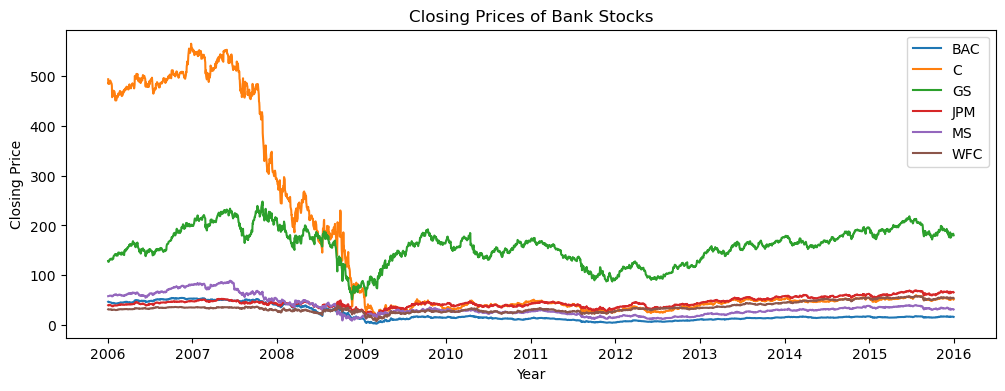

In [307]:
plt.figure(figsize=(12,4))
for tick in tickers:
    sns.lineplot(bank_stocks[tick]['Close'],label=tick)
plt.legend()
plt.title('Closing Prices of Bank Stocks')
plt.xlabel('Year')
plt.ylabel('Closing Price')

In [308]:
bank_stocks.xs(key='Close',axis=1,level='STOCK INFO').iplot(kind='spread')

/Users/samyak_it_is/anaconda3/lib/python3.11/site-packages/cufflinks/plotlytools.py:849: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.



In [309]:
bank_stocks.xs(key='Close',axis=1,level='STOCK INFO').iplot()

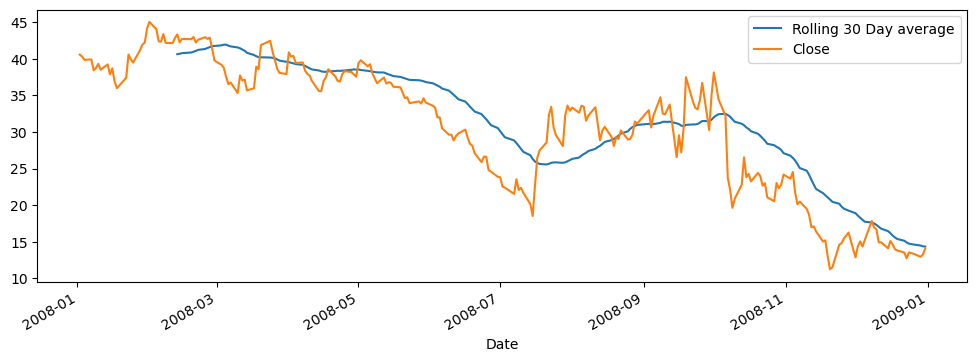

In [310]:
plt.figure(figsize=(12,4))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='Rolling 30 Day average')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot()
plt.legend()

# Creating a Heatmap of Corr between Closing Price of Stocks

<Axes: xlabel='BANK TICKERS', ylabel='BANK TICKERS'>

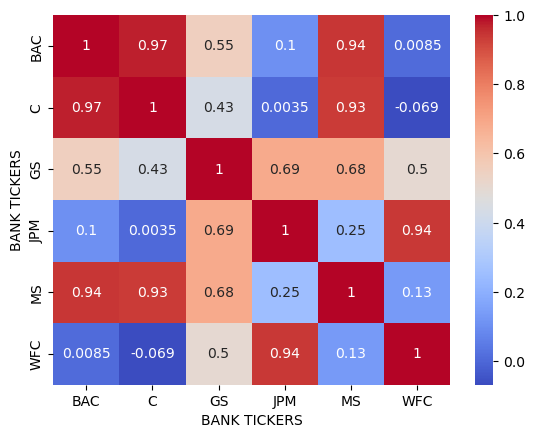

In [311]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='STOCK INFO').corr(),annot=True,cmap='coolwarm')
# bank_stocks.xs(key='Close',axis=1,level='STOCK INFO').corr()

# Creating a Clustermap of Corr between Closing Price of Stocks

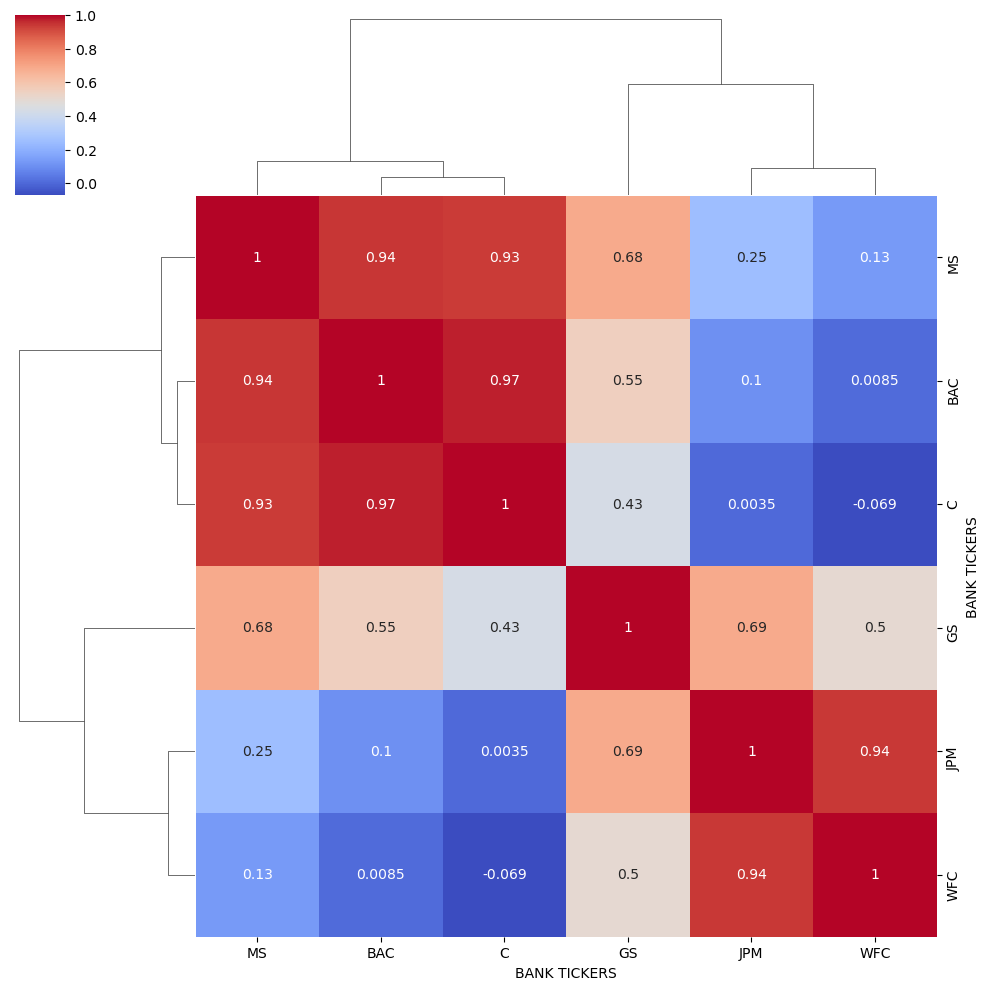

In [312]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='STOCK INFO').corr(),annot=True,cmap='coolwarm')

In [313]:
close_corr=bank_stocks.xs(key='Close',axis=1,level='STOCK INFO').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

# Candle Plot for the Bank of America stock for the year 2015

In [314]:
bac15=BAC[['Open','High','Low','Close']].loc['2015-01-01':'2016-01-01']
bac15.iplot(kind='candle')

# Simple Moving Averages Plot of Morgan Stanley for Year 2015

In [315]:
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55]) #simple moving average
#ta_plot is technical analysis plot of cufflinks

In [316]:
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll') #Bollinger Bands